[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aim-lab/PVBM/blob/main/pvbmtutorial.ipynb)

# PVBM Tutorial

If you are using colab, install the pvbm library by uncommenting the following cell

In [1]:
#pip install pvbm --upgrade``

## Import the libraries

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt 
from skimage.morphology import skeletonize,square,dilation
import os
import pathlib
import sys
from matplotlib.colors import ListedColormap

sys.setrecursionlimit(100000)

## Download the PVBM datasets

In [4]:
path_to_save_datasets = "../PVBM_datasets"

In [5]:
from PVBM.Datasets import PVBMDataDownloader
dataset_downloader = PVBMDataDownloader()
dataset_downloader.download_dataset(name="Crop_HRF", save_folder_path=path_to_save_datasets)
dataset_downloader.download_dataset(name="INSPIRE", save_folder_path=path_to_save_datasets)
dataset_downloader.download_dataset(name="UNAF", save_folder_path=path_to_save_datasets)
print("Images downloaded successfully")

Downloading...
From (original): https://drive.google.com/uc?id=1QcozuK5yDyXbBkHqkbM5bxEkTGzkPDl3
From (redirected): https://drive.google.com/uc?id=1QcozuK5yDyXbBkHqkbM5bxEkTGzkPDl3&confirm=t&uuid=a2d7d6ed-dbaf-4d83-b4d2-2b8457e2023d
To: /Users/jonathanfhima/Desktop/PVBMRelated/PVBM/Crop_HRF.zip
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42.0M/42.0M [00:01<00:00, 28.0MB/s]


Dataset downloaded and saved to Crop_HRF.zip
Files extracted to ../PVBM_datasets
Deleted the zip file: Crop_HRF.zip


Downloading...
From (original): https://drive.google.com/uc?id=18TcmkuN_eZgM2Ph5XiX8x7_ejtKhA3qb
From (redirected): https://drive.google.com/uc?id=18TcmkuN_eZgM2Ph5XiX8x7_ejtKhA3qb&confirm=t&uuid=673cf335-4396-45cc-ba47-7b4c13e3f14c
To: /Users/jonathanfhima/Desktop/PVBMRelated/PVBM/INSPIRE.zip
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.6M/29.6M [00:01<00:00, 27.8MB/s]


Dataset downloaded and saved to INSPIRE.zip
Files extracted to ../PVBM_datasets
Deleted the zip file: INSPIRE.zip


Downloading...
From: https://drive.google.com/uc?id=1IM5qUEARNp2RFpzKmILbdgasjLuJEIcX
To: /Users/jonathanfhima/Desktop/PVBMRelated/PVBM/UNAF.zip
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19.7M/19.7M [00:00<00:00, 20.7MB/s]


Dataset downloaded and saved to UNAF.zip
Files extracted to ../PVBM_datasets
Deleted the zip file: UNAF.zip
Images downloaded successfully


In [6]:
list(pathlib.Path(path_to_save_datasets).glob("*/*"))

[PosixPath('../PVBM_datasets/Paraguay_crop/artery'),
 PosixPath('../PVBM_datasets/Paraguay_crop/veins'),
 PosixPath('../PVBM_datasets/Paraguay_crop/images'),
 PosixPath('../PVBM_datasets/Paraguay_crop/unknown'),
 PosixPath('../PVBM_datasets/INSPIRE/artery'),
 PosixPath('../PVBM_datasets/INSPIRE/veins'),
 PosixPath('../PVBM_datasets/INSPIRE/images'),
 PosixPath('../PVBM_datasets/INSPIRE/labels'),
 PosixPath('../PVBM_datasets/__MACOSX/._CropHRF'),
 PosixPath('../PVBM_datasets/__MACOSX/CropHRF'),
 PosixPath('../PVBM_datasets/CropHRF/artery'),
 PosixPath('../PVBM_datasets/CropHRF/veins'),
 PosixPath('../PVBM_datasets/CropHRF/images'),
 PosixPath('../PVBM_datasets/CropHRF/unknown')]

## Load an image

In [7]:
segmentation_path = list(pathlib.Path(path_to_save_datasets).glob("INSPIRE/artery/*"))[0]
segmentation_path

PosixPath('../PVBM_datasets/INSPIRE/artery/image8.png')

In [8]:
segmentation = Image.open(segmentation_path) #Open the segmentation

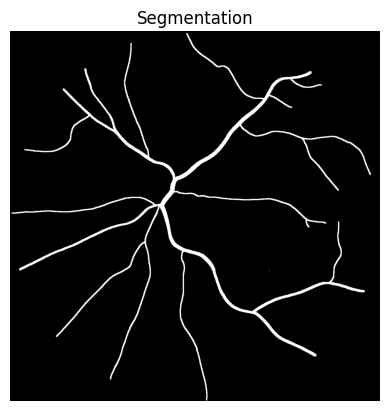

In [9]:
plt.imshow(segmentation,cmap = "gray") #Display the segmentation
plt.title("Segmentation")
plt.axis('off')
plt.show()

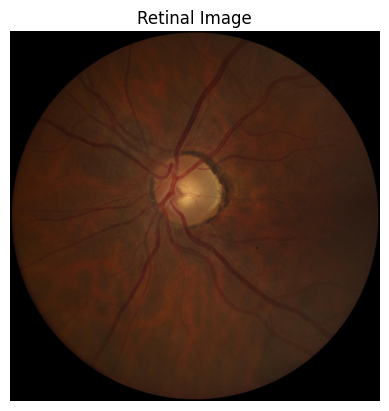

In [10]:
image_path = str(segmentation_path).replace("artery","images").replace("veins", "images")
image = Image.open(image_path)
plt.imshow(image) #Display the segmentation
plt.title("Retinal Image")
plt.axis('off')
plt.show()

In [11]:
segmentation = np.array(segmentation)/255 #Convert the segmentation to a numpy array with value 0 and 1
skeleton = skeletonize(segmentation)*1 #Compute the skeleton of the segmentation


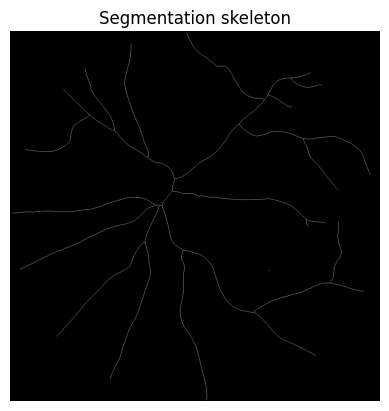

In [12]:
plt.imshow(skeleton,cmap = 'gray')
plt.title("Segmentation skeleton")
plt.axis('off')
plt.show()

## Extract the optic disc

In [13]:
from PVBM.DiscSegmenter import DiscSegmenter
segmenter = DiscSegmenter()

Model path: /Users/jonathanfhima/Desktop/PVBMRelated/PVBM/PVBM/lunetv2_odc.onnx
Model already exists, skipping download.


In [14]:
optic_disc = segmenter.segment(image_path=str(segmentation_path).replace("artery","images").replace("veins", "images"))

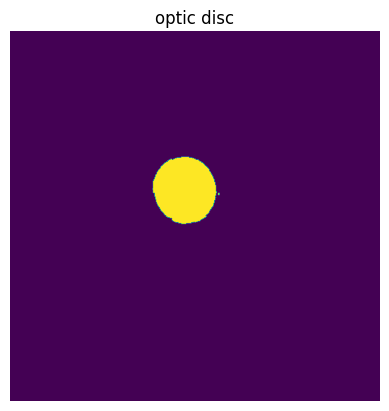

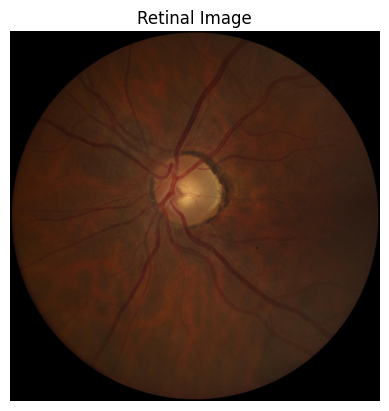

In [15]:
plt.imshow(optic_disc)
plt.title("optic disc")
plt.axis('off')
plt.show()
plt.imshow(image) 
plt.title("Retinal Image")
plt.axis('off')
plt.show()

In [16]:
#Compute the center and radius of the optic disc, as well as the Region of Interest (ROI) on which the Geometrical VBMs will be computed
#And the zones ABC on which the Central Retinal Equivalent will be computed
center, radius, roi, zones_ABC = segmenter.post_processing(segmentation=optic_disc, max_roi_size=600) 

In [17]:
center

(682, 620)

In [18]:
radius

133

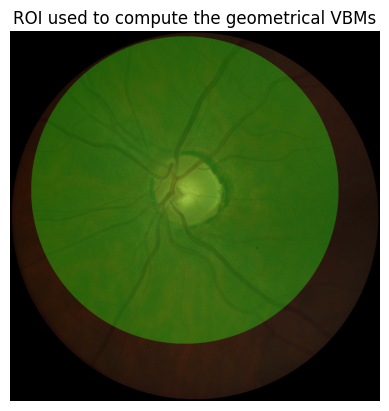

In [19]:
plt.imshow(image)
plt.imshow(roi, alpha = 0.3)
plt.title("ROI used to compute the geometrical VBMs")
plt.axis('off')
plt.show()

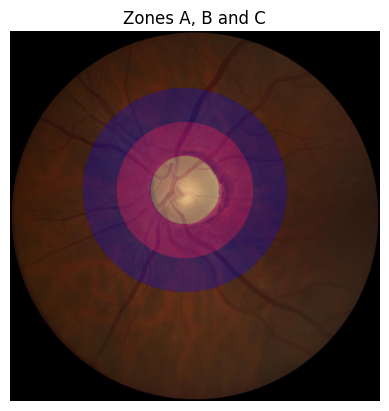

In [20]:
plt.imshow(image)
plt.imshow(zones_ABC/255, alpha = 0.5)
plt.title("Zones A, B and C")
plt.axis('off')
plt.show()

## Compute the geometrical VBMs

In [21]:
from PVBM.GeometryAnalysis import GeometricalVBMs #Import the geometry analysis module
geometricalVBMs = GeometricalVBMs() #Instanciate a geometrical VBM object

In [22]:
segmentation_roi, skeleton_roi = geometricalVBMs.apply_roi(
    segmentation=segmentation, 
    skeleton=skeleton,
    zones_ABC=zones_ABC,
    roi=roi
)

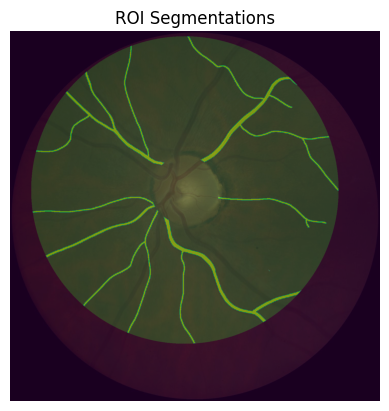

In [23]:
plt.imshow(image)
plt.imshow(segmentation_roi, alpha = 0.5)
plt.imshow(roi, alpha = 0.2)
plt.title("ROI Segmentations") #Segmentation within the ROI that will be used for the geometrical VBMs
plt.axis('off')
plt.show()

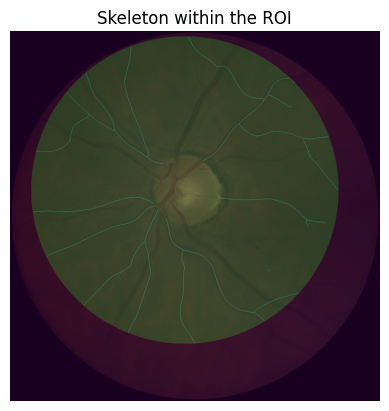

In [24]:
plt.imshow(image)
plt.imshow(skeleton_roi, alpha = 0.5)
plt.imshow(roi, alpha = 0.2)
plt.title("Skeleton within the ROI") #that will be used for the geometrical VBMs
plt.axis('off')
plt.show()

In [25]:
vbms, visual = geometricalVBMs.compute_geomVBMs(
    blood_vessel=segmentation_roi,
    skeleton=skeleton_roi,
    xc=center[0],
    yc=center[1],
    radius=radius
)

In [26]:
area, TI, medTor, ovlen, medianba, startp, endp, interp = vbms
area, TI, medTor, ovlen, medianba, startp, endp, interp
print(f"\n Area : {area} \n Tortuosity Index: {TI} \n Median Tortuosity: {medTor}\n Overall Length {ovlen} \n Median Branching angles {medianba}\n Number of Start/End/Intersection points {startp}/ {endp} / {interp}")


 Area : 52340.0 
 Tortuosity Index: 1.094966815867056 
 Median Tortuosity: 1.0822196059435547
 Overall Length 6734.379577000198 
 Median Branching angles 77.68055474336339
 Number of Start/End/Intersection points 7/ 18.0 / 11.0


In [27]:
endpoints, interpoints, startpoints, angles_dico, topology_dico = visual

### Plot the branching angles

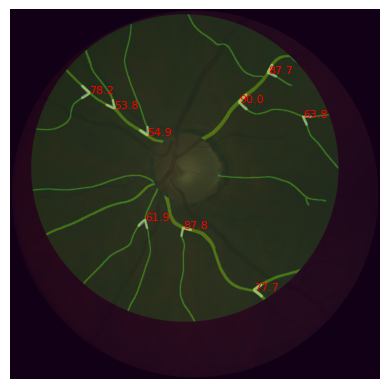

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import line_aa
from scipy.ndimage import binary_dilation


def display_angles(angles_dico, img):
    for key, value in angles_dico.items():
        b = key
        if len(value) == 2:
            a, c = value
            if all(x is not None for x in (a, b, c)):
                ba = np.array(a) - np.array(b)
                bc = np.array(c) - np.array(b)
                cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
                angle = np.arccos(cosine_angle)
                rr, cc, val = line_aa(b[0], b[1], a[0], a[1])
                img[rr, cc] = val * 255
                rr, cc, val = line_aa(b[0], b[1], c[0], c[1])
                img[rr, cc] = val * 255
                plt.text(b[1], b[0], f"{np.degrees(angle):.1f}", color='red', fontsize=8)
        elif len(value) == 3:
            a, c, d = value
            if all(x is not None for x in (a, b, c, d)):
                # First angle (a-b-c)
                ba = np.array(a) - np.array(b)
                bc = np.array(c) - np.array(b)
                cosine_angle_ac = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
                angle_ac = np.arccos(cosine_angle_ac)
                rr, cc, val = line_aa(b[0], b[1], a[0], a[1])
                img[rr, cc] = val * 255
                rr, cc, val = line_aa(b[0], b[1], c[0], c[1])
                img[rr, cc] = val * 255
                plt.text(b[1], b[0], f"{np.degrees(angle_ac):.1f}", color='red', fontsize=8)
                
                # Second angle (c-b-d)
                bc = np.array(c) - np.array(b)
                bd = np.array(d) - np.array(b)
                cosine_angle_cd = np.dot(bc, bd) / (np.linalg.norm(bc) * np.linalg.norm(bd))
                angle_cd = np.arccos(cosine_angle_cd)
                rr, cc, val = line_aa(b[0], b[1], c[0], c[1])
                img[rr, cc] = val * 255
                rr, cc, val = line_aa(b[0], b[1], d[0], d[1])
                img[rr, cc] = val * 255
                plt.text(b[1], b[0] + 10, f"{np.degrees(angle_cd):.1f}", color='red', fontsize=8)

img = np.zeros_like(segmentation)

display_angles(angles_dico, img)

# Dilate the image
img_dilated = binary_dilation(img, structure=np.ones((8,8))) * 255

plt.imshow(image)
plt.imshow(segmentation_roi, alpha = 0.5)
plt.imshow(roi, alpha = 0.2)
plt.imshow(img_dilated, cmap='gray', alpha = 0.3)
plt.axis('off')
plt.show()


### Plot the particular points

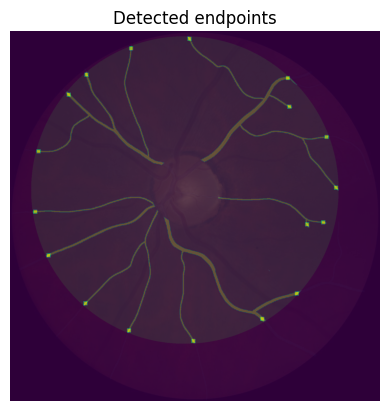

In [29]:
plt.imshow(image)
plt.imshow(segmentation_roi, alpha = 0.5)
plt.imshow(roi, alpha = 0.2)
plt.imshow(segmentation/50+dilation(endpoints, square(15)), alpha = 0.5)
plt.title("Detected endpoints")
plt.axis('off')
plt.show()

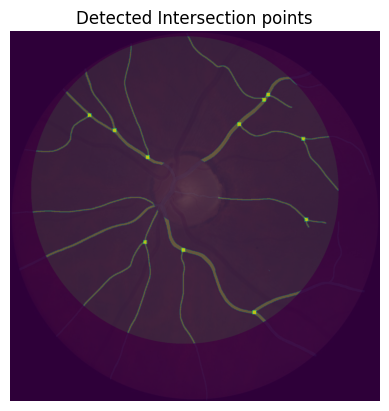

In [30]:
plt.imshow(image)
plt.imshow(segmentation_roi, alpha = 0.5)
plt.imshow(roi, alpha = 0.2)
plt.imshow(segmentation/20+dilation(interpoints, square(15)), alpha = 0.5)
plt.title("Detected Intersection points")
plt.axis('off')
plt.show()

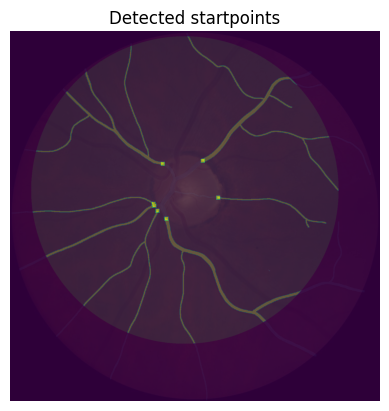

In [31]:
plt.imshow(image)
plt.imshow(segmentation_roi, alpha = 0.5)
plt.imshow(roi, alpha = 0.2)
plt.imshow(segmentation/20+dilation(startpoints, square(15)), alpha = 0.5)
plt.title("Detected startpoints")
plt.axis('off')
plt.show()


### Plot the linear interpolation of the particular points

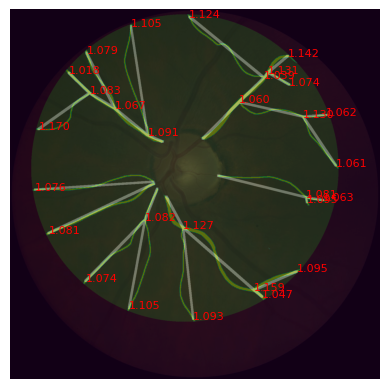

In [32]:
from skimage.draw import line_aa
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import binary_dilation

img = np.zeros_like(segmentation)

for key, value in topology_dico.items():
        rr, cc, val = line_aa(key[0], key[1], key[2], key[3])
        img[rr, cc] = val * 255
        plt.text(key[3], key[2], f"{value[0]/value[1]:.3f}", color='red', fontsize=8)

# Dilate the image
img_dilated = binary_dilation(img, structure=np.ones((8,8))) * 255

plt.imshow(image)
plt.imshow(segmentation_roi, alpha = 0.5)
plt.imshow(roi, alpha = 0.2)
plt.imshow(img_dilated, cmap='gray', alpha = 0.3)
plt.axis('off')
plt.show()



## Fractal Analysis

In [33]:
from PVBM.FractalAnalysis import MultifractalVBMs
fractalVBMs = MultifractalVBMs(n_rotations = 25,optimize = True, min_proba = 0.0001, maxproba = 0.9999)

In [34]:
D0,D1,D2,SL = fractalVBMs.compute_multifractals(segmentation_roi.copy())

In [35]:
print("The fractal biomarkers are D0: {}, D1: {}, D2: {}, SL: {}".format(D0,D1,D2,SL))

The fractal biomarkers are D0: 1.3344921958711857, D1: 1.2982229835136063, D2: 1.2798524605762445, SL: 0.9573680985889439


## Central Retinal Equivalent Analysis

In [36]:
from PVBM.CentralRetinalAnalysis import CREVBMs
creVBMs = CREVBMs()

In [37]:
segmentation_roi, skeleton_roi = creVBMs.apply_roi(
    segmentation=segmentation,
    skeleton=skeleton,
    zones_ABC=zones_ABC
)


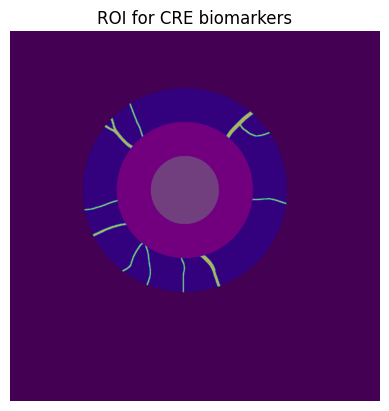

In [38]:
plt.imshow(segmentation_roi)
plt.imshow(zones_ABC/255, alpha = 0.5)
plt.axis('off')
plt.title("ROI for CRE biomarkers")
plt.show()

In [39]:
#This allows to generate the CRE visualisation but require a lot of RAM
#If you are only interested about the VBMs values then set it to False
plot = True 

In [40]:
out = creVBMs.compute_central_retinal_equivalents(
    blood_vessel=segmentation_roi.copy(),
    skeleton=skeleton_roi.copy(),
    xc=center[0],
    yc=center[1],
    radius=radius,
    artery = True,
    Toplot = plot 
)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [41]:
if out == -1:
    raise ValueError("The CRE computation failed")
else:
    output, visualisation = out
    print(output)


{'craek': 17.597833412365436, 'craeh': 19.17509597260818}


In [42]:
if plot:
    # Load all the logs to build the cre visualisation
    measurements = [item['plot'] for item in visualisation]
    # Compute the aggregated visualisation
    measurements = np.maximum.reduce(measurements)

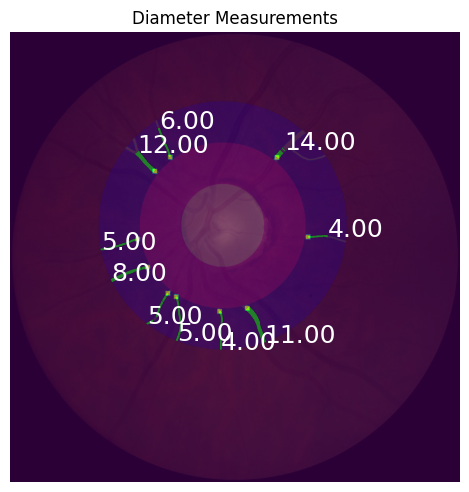

In [43]:
if plot:
    
    # Create a new figure
    plt.imshow(image)
    plt.imshow(segmentation_roi, alpha = 0.3)
    plt.imshow(zones_ABC/255, alpha = 0.5)
    plt.imshow(measurements)
    
    
    startpoints_cre = np.zeros((segmentation_roi.shape[0], segmentation_roi.shape[1]))
    
    # Annotate the image with 'Mean diameter' from each dictionary
    for item in visualisation:
    
        startpoints_cre[item["start"]] = 1
        # Get the 'end' location and 'Mean diameter'
        end_location = item['end']  # Assuming 'end' is a tuple (x, y)
        mean_diameter = "{:.2f}".format(item['Median diameter'])
        
        # Annotate the image
        plt.annotate(mean_diameter, 
                     (end_location[1], end_location[0]),
                     color='white', 
                     fontsize=18)
        
    # Display the combined image
    plt.imshow(dilation(startpoints_cre, square(15)), alpha = 0.5)
    
    plt.axis('off')
    plt.tight_layout()
    plt.title("Diameter Measurements")
    plt.show()